# Machine Learning LAB 1 
Course 2023/24: F. Chiariotti

The notebook contains some simple tasks to be performed about **classification and regression**. <br>
Complete all the **required code sections** and **answer to all the questions**. <br>

### IMPORTANT for the evaluation score:
1. **Read carefully all cells** and **follow the instructions**
1. **Rerun all the code from the beginning** to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebooks.
2. Make sure to fill the code in the appropriate places **without modifying the template**, otherwise you risk breaking later cells.
3. Please **submit the jupyter notebook file (.ipynb)**, do not submit python scripts (.py) or plain text files. **Make sure that it runs fine with the restat&run all command** - otherwise points will be deduced.
4. **Answer the questions in the appropriate cells**, not in the ones where the question is presented.

## A) Classification of Stayed/Churned Customers

Place your **name** and **ID number** (matricola) in the cell below. <br>
Also recall to **save the file as Surname_Name_LAB1.ipynb** otherwise your homework could get lost
<br>

**Student name**: Giacomo Menegatti<br>
**ID Number**: 2122852

<div class="alert alert-block alert-info">
**WARNING**:<br>
I had a couple of images too of the training and test errors for the perceptron up to 3000 iterations but I can't load them on elearning. Those graphs can be created again but it's a really slow process, so I set the corresponding cell to 'raw' to stop it to be executed. 
 </div>

### Dataset description

The Customer Churn table contains information on all 3,758 customers from a Telecommunications company in California in Q2 2022. 
The dataset contains three features:
- **Tenure in Months**: Number of months the customer has stayed with the company
- **Monthly Charge**: The amount charged to the customer monthly
- **Age**: Customer's age

The aim of the task is to predict if a customer will churn or not based on the three features.

<center>

![COVER](data/dataset-cover.png "COVER")

</center>

We first **import** all **the packages** that are needed.

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model, preprocessing

/home/menegattig/sketchbook/python_notebooks/MachineLearning/Lab1.


Change some global settings for layout purposes.

In [2]:
# if you are in the jupyter notebook environment you can change the 'inline' option with 'notebook' to get interactive plots

#%matplotlib widget  #I used widget because works better for me on vscode
%matplotlib inline

# change the limit on the line length and crop to 0 very small numbers, for clearer printing
np.set_printoptions(linewidth=500, suppress=True)

## A.1) Perceptron
In the following cells we will **implement** the **perceptron** algorithm and use it to learn a halfspace.

**TO DO (A.1.0):** **Set** the random **seed** using your **ID**. If you need to change it for testing add a constant explicitly, eg.: 1234567 + 1

In [3]:
IDnumber = 2122852  # YOUR_ID
np.random.seed(IDnumber)

Before proceding to the training steps, we **load the dataset and split it** in training and test set (the **training** set is **typically larger**, here we use a 75% training 25% test split).
The **split** is **performed after applying a random permutation** to the dataset, such permutation will **depend on the seed** you set above. Try different seeds to evaluate the impact of randomization.<br><br>
**DO NOT CHANGE THE PRE-WRITTEN CODE UNLESS OTHERWISE SPECIFIED**

### The Dataset
The dataset is a `.csv` file containing three input features and a label. Here is an example of the first 4 rows of the dataset: 

<center>

Tenure in Months | Monthly Charge | Age | Customer Status |
| -----------------| ---------------|-----|-----------------|
| 9 | 65.6 | 37 | 0 |
| 9 | -4.0 | 46 | 0 |
| 4 | 73.9 | 50 | 1 |
| ... | ... | ... | ... |

</center>

Customer Status is 0 if the customer has stayed with the company and 1 if the customer has churned.

In [4]:
def load_dataset(filename):
    data_train = pd.read_csv(filename)
    #permute the data
    data_train = data_train.sample(frac=1).reset_index(drop=True) # shuffle the data
    X = data_train.iloc[:, 0:3].values # Get first two columns as the input
    Y = data_train.iloc[:, 3].values # Get the third column as the label
    Y = 2*Y-1 # Make sure labels are -1 or 1 (0 --> -1, 1 --> 1)
    return X,Y

In [5]:
# Load the dataset
X, Y = load_dataset('data/telecom_customer_churn_cleaned.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/telecom_customer_churn_cleaned.csv'

We are going to differentiate (classify) between **class "1" (churned)** and **class "-1" (stayed)**

# Split data in training and test sets



Given $m$ total data, denote with $m_{t}$ the part used for training. Keep $m_t$ data as training data, and $m_{test}:= m-m_{t}$. <br>
For instance one can take $m_t=0.75m$ of the data as training and $m_{test}=0.25m$ as testing. <br>
Let us define as define

$\bullet$ $S_{t}$ the training data set

$\bullet$ $S_{test}$ the testing data set


The reason for this splitting is as follows:

TRAINING DATA: The training data are used to compute the empirical loss
$$
L_S(h) = \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
which is used to estimate $h$ in a given model class ${\cal H}$.
i.e. 
$$
\hat{h} = {\rm arg\; min}_{h \in {\cal H}} \, L_S(h)
$$

TESTING DATA: The test data set can be used to estimate the performance of the final estimated model
$\hat h_{\hat d_j}$ using:
$$
L_{{\cal D}}(\hat h_{\hat d_j}) \simeq \frac{1}{m_{test}} \sum_{ z_i \in S_{test}} \ell(\hat h_{\hat d_j},z_i)
$$

**TO DO (A.1.1):** **Divide** the **data into training and test set** (**75%** of the data in the **first** set, **25%** in the **second** one). <br>
<br>
Notice that as is common practice in Statistics and Machine Learning, **we scale the data** (= each variable) so that it is centered **(zero mean)** and has **standard deviation equal to 1**. <br>
This helps in terms of numerical conditioning of the (inverse) problems of estimating the model (the coefficients of the linear regression in this case), as well as to give the same scale to all the coefficients.

In [ ]:
# compute the splits
m_training = round(0.75*len(X))

# m_test is the number of samples in the test set (total-training)
m_test =  len(X)-m_training


# X_training = instances for training set
X_training =  X[:m_training]
# Y_training = labels for the training set
Y_training =  Y[:m_training]

# X_test = instances for test set
X_test =   X[m_training:]
# Y_test = labels for the test set
Y_test =  Y[m_training:]

print("Number of samples in the train set:", X_training.shape[0])
print("Number of samples in the test set:", X_test.shape[0])
print("\nNumber of night instances in test:", np.sum(Y_test==-1))
print("Number of day instances in test:", np.sum(Y_test==1))

# standardize the input matrix
# the transformation is computed on training data and then used on all the 3 sets
scaler = preprocessing.StandardScaler().fit(X_training) #fits the parameter of transformation on the training set

np.set_printoptions(suppress=True) # sets to zero floating point numbers < min_float_eps
X_training =  scaler.transform(X_training)  #transforms the value using the fit parameters found before
print ("\nMean of the training input data:", X_training.mean(axis=0))
print ("Std of the training input data:",X_training.std(axis=0))

X_test =  scaler.transform(X_test)  #Does the same to the test set but using the parameters found for the training 
print ("Mean of the test input data:", X_test.mean(axis=0))
print ("Std of the test input data:", X_test.std(axis=0))

Number of samples in the train set: 2818
Number of samples in the test set: 939

Number of night instances in test: 478
Number of day instances in test: 461

Mean of the training input data: [-0. -0.  0.]
Std of the training input data: [1. 1. 1.]
Mean of the test input data: [ 0.01269855 -0.01963778 -0.00410137]
Std of the test input data: [0.98323724 1.03319628 1.02985004]


We **add a 1 in front of each sample** so that we can use a vector in **homogeneous coordinates** to describe all the coefficients of the model. This can be done with the function $hstack$ in $numpy$.

In [ ]:
def to_homogeneous(X_training, X_test):
    # Add a 1 to each sample (homogeneous coordinates)
    X_training = np.hstack( [np.ones( (X_training.shape[0], 1) ), X_training] )
    X_test = np.hstack( [np.ones( (X_test.shape[0], 1) ), X_test] )
    
    return X_training, X_test

In [ ]:
# convert to homogeneous coordinates using the function above
X_training, X_test = to_homogeneous(X_training, X_test)
print("Training set in homogeneous coordinates:")
print(X_training[:10])

Training set in homogeneous coordinates:
[[ 1.          1.68808887  1.03309806 -0.80075314]
 [ 1.         -0.64016305  0.28619794 -1.39186812]
 [ 1.         -1.09749825  0.09106187  1.2681493 ]
 [ 1.          0.48238698  0.7269363  -0.74164164]
 [ 1.         -0.14125193 -1.62478977  1.03170331]
 [ 1.         -0.76489083  0.0977907  -0.56430714]
 [ 1.          0.27450735  0.78244914  1.2681493 ]
 [ 1.         -1.13907418 -0.74835967  0.91348032]
 [ 1.         -1.18065011  0.94225886 -1.09631063]
 [ 1.          1.52178516  1.25514945  1.14992631]]


**TO DO (A.1.2):** Now **complete** the function *perceptron*. <br>
The **perceptron** algorithm **does not terminate** if the **data** is not **linearly separable**, therefore your implementation should **terminate** if it **reached the termination** condition seen in class **or** if a **maximum number of iterations** have already been run, where one **iteration** corresponds to **one update of the perceptron weights**. In case the **termination** is reached **because** the **maximum** number of **iterations** have been completed, the implementation should **return the best model** seen throughout .

The input parameters to pass are:
- $X$: the matrix of input features, one row for each sample
- $Y$: the vector of labels for the input features matrix X
- $max\_num\_iterations$: the maximum number of iterations for running the perceptron

The output values are:
- $best\_w$: the vector with the coefficients of the best model (or the latest, if the termination condition is reached)
- $best\_error$: the *fraction* of misclassified samples for the best model

In [ ]:
def count_errors(current_w, X, Y):
    # This function:
    # computes the number of misclassified samples
    # returns the index of all misclassified samples
    # if there are no misclassified samples, returns -1 as index
    
    index_misclassified = [i for i in range(X.shape[0]) if np.dot(current_w, X[i])*Y[i]<=0]
    
    num_misclassified = len(index_misclassified)
    
    if num_misclassified == 0:
        index_misclassified = -1
    
    return num_misclassified, index_misclassified
        
        
def perceptron_update(current_w, x, y):
    # Place in this function the update rule of the perceptron algorithm
    # Remember that numpy arrays can be treated as generalized variables
    # therefore given array a = [1,2,3,4], the operation b = 10*a will yield
    # b = [10, 20, 30, 40]
    new_w = current_w + x*y 
    return new_w

def perceptron_no_randomization(X, Y, max_num_iterations):
    
    # Initialize some support variables
    num_samples = X.shape[0]
    # best_errors will keep track of the best (minimum) number of errors
    # seen throughout training, used for the update of the best_w variable
    best_error = num_samples+1
    
    # Initialize the weights of the algorith with w=0
    curr_w = np.zeros(X.shape[1])
    # The best_w variable will be used to keep track of the best solution
    best_w = curr_w.copy()

    # compute the number of misclassified samples and the index of the first of them
    num_misclassified, index_misclassified = count_errors(curr_w, X, Y)
    # update the 'best' variables
    if num_misclassified < best_error:
        best_error = num_misclassified
        best_w = curr_w
        
    # initialize the number of iterations
    num_iter = 0
    # Main loop continue until all samples correctly classified or max # iterations reached
    # Remember that to signify that no errors were found we set index_misclassified = -1
    while index_misclassified != -1 and num_iter < max_num_iterations:
        
         # Choose the misclassified sample with the lowest index at each iteration
        num_iter = num_iter + 1         # increase iteration number
        i = index_misclassified[0]      #correct the perceptron using the first error found
        curr_w = perceptron_update(curr_w, X[i], Y[i]) 
        num_misclassified, index_misclassified = count_errors(curr_w, X, Y)
        
        if num_misclassified < best_error:
            best_error = num_misclassified
            best_w = curr_w
            
        
        
    # as required, return the best error as a ratio with respect to the total number of samples
    best_error = best_error/num_samples
    
    return best_w, best_error

Now we use the implementation above of the perceptron to learn a model from the training data using 30 iterations and print the error of the best model we have found.

In [ ]:
# Now run the perceptron for 100 iterations
w_found, error = perceptron_no_randomization(X_training,Y_training, 30)
print("Training Error of perceptron (30 iterations): " + str(error))

Training Error of perceptron (30 iterations): 0.3956706884315117


**TO DO (A.1.3):** use the best model $w\_found$ to **predict the labels for the test dataset** and print the fraction of misclassified samples in the test set (the test error that is an estimate of the true loss).

In [ ]:
errors, _ = count_errors(w_found, X_test,Y_test)

true_loss_estimate = errors/X_test.shape[0]   # Error rate on the test set
# NOTE: you can avoid using num_errors if you prefer, as long as true_loss_estimate is correct
print("Test Error of perceptron (30 iterations): " + str(true_loss_estimate))

Test Error of perceptron (30 iterations): 0.402555910543131


**TO DO (A.1.4):** implement the correct randomized version of the perceptron such that at each iteration the algorithm picks a random misclassified sample and updates the weights using that sample.

In [ ]:
def perceptron(X, Y, max_num_iterations):
    # Use the previous function as a template to 
    # implement the random version of the perceptron algorithm
    
    # Initialize some support variables
    num_samples = X.shape[0]
    # best_errors will keep track of the best (minimum) number of errors
    # seen throughout training, used for the update of the best_w variable
    best_error = num_samples+1
    
    # Initialize the weights of the algorith with w=0
    curr_w = np.zeros(X.shape[1])
    # The best_w variable will be used to keep track of the best solution
    best_w = curr_w.copy()

    # compute the number of misclassified samples and the index of the first of them
    num_misclassified, index_misclassified = count_errors(curr_w, X, Y)
    # update the 'best' variables
    if num_misclassified < best_error:
        best_error = num_misclassified
        best_w = curr_w
        
    # initialize the number of iterations
    num_iter = 0
    # Main loop continue until all samples correctly classified or max # iterations reached
    # Remember that to signify that no errors were found we set index_misclassified = -1
    while index_misclassified != -1 and num_iter < max_num_iterations:
        
         # Choose the misclassified sample with the lowest index at each iteration
        num_iter = num_iter + 1         # increase iteration number
        i = np.random.choice(index_misclassified)           # pick a random index from the miscalssified list
        curr_w = perceptron_update(curr_w, X[i], Y[i])      # correct the perceptron using said index
        num_misclassified, index_misclassified = count_errors(curr_w, X, Y)
        
        if num_misclassified < best_error:  
            best_error = num_misclassified
            best_w = curr_w
        
        
    # as required, return the best error as a ratio with respect to the total number of samples
    best_error = best_error/num_samples
    
    return best_w, best_error

**TO DO (A.1.5):** Now test the correct version of the perceptron using 30 iterations and print the error of the best model we have found.

In [ ]:
# Now run the perceptron for 30 iterations
w_found, error = perceptron(X_training,Y_training, 30)
print("Training Error of perceptron (30 iterations): " + str(error))

errors, _ = count_errors(w_found, X_test,Y_test)

true_loss_estimate = errors/X_test.shape[0]  # Error rate on the test set
# NOTE: you can avoid using num_errors if you prefer, as long as true_loss_estimate is correct
print("Test Error of perceptron (30 iterations): " + str(true_loss_estimate))

Training Error of perceptron (30 iterations): 0.2512420156139106
Test Error of perceptron (30 iterations): 0.2854100106496273


**TO DO (A.Q2) [Answer the following]** <br>
What is the difference between the two versions of the perceptron? Can you explain why there is this difference? <br>

<div class="alert alert-block alert-info">
**ANSWER A.Q2**:<br>
The miscalssified points fraction, both on the training and on the test set, is smaller for the random perceptron ( 0.3957 and 0.4026 versus 0.2512 and 0.2854, respectively). This happen because the random implementation of the perceptron is better and more robust as the results depends only on the points and not on how they are ordered. Instead the first implementation returns a result biased on the first points of the list, thata are corrected more often.
 </div>

### Now consider only a the random version of the perceptron

**TO DO (A.Q2) [Answer the following]** <br>
What about the difference between the training error and the test error  in terms of fraction of misclassified samples? Explain what you observe. (Notice that with a very small dataset like this one results can change due to randomization, try to run with different random seeds if you get unexpected results).

<div class="alert alert-block alert-info">
**ANSWER A.Q2**:<br>
The problem is not separable (at least up to the number of iteraction used) as the training error doesn't go to zero. As expected, the error on the test set is bigger because the points from that set are different than the data over which perceptron is trying to minimize the number of misclassified points. This can be seen also from the normalization done at the start of the program: the mean and standard deviation of the test set is similar but not exactly 0 and 1 as for the training set over the normalization is computed, as the two set are similar (as taken from the same dataset).
 </div>

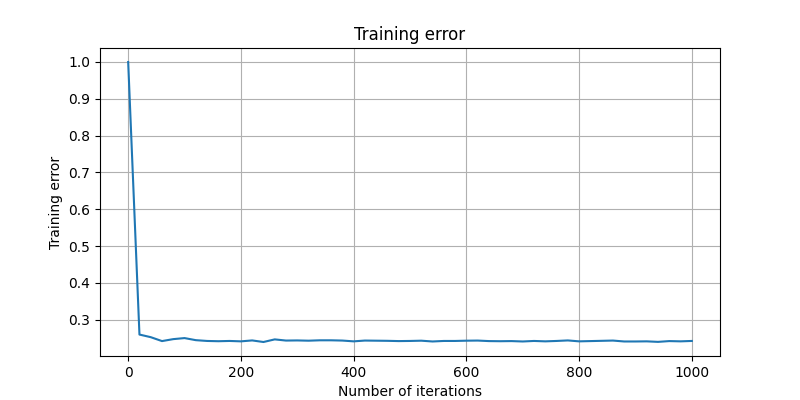

In [ ]:
# Plot the loss with respect to the number of iterations
plt.figure(figsize=(8,4))

num_iters = np.arange(0, 1001, 20)
errors = []

for num_iter in num_iters:
    _, error = perceptron(X_training, Y_training, num_iter)
    errors.append(error)

plt.title('Training error')
plt.plot(num_iters, errors)
plt.xlabel('Number of iterations')
plt.ylabel('Training error')
plt.grid()

# NOTE how the training loss decreases as we increase the number of iterations

**TO DO (A.1.6):** Copy the code from the last 2 cells above in the cell below and repeat the training with 3000 iterations. Then print the error in the training set and the estimate of the true loss obtained from the test set.

In [ ]:
w_found, error = perceptron(X_training, Y_training, 3000)
print("Training Error of perceptron (3000 iterations): " + str(error))

num_errors, _ =  count_errors(w_found, X_test, Y_test) 

true_loss_estimate = num_errors/X_test.shape[0]
print("Test Error of perceptron (3000 iterations): " + str(true_loss_estimate))

Training Error of perceptron (3000 iterations): 0.23988644428672817
Test Error of perceptron (3000 iterations): 0.27050053248136313


<div class="alert alert-block alert-info">
I added this code to plot both the training and the test fractions of misclassified samples. This code works but it's really slow if iterations up to 2000-3000 are used, so I converted the cell to raw data to avoid executing it when running the whole notebook. To execute it, just switch the language to python. The final graphs are shown at the end of the chapter.
</div>

**TO DO (A.Q3) [Answer the following]** <br>
What about the difference between the training error and the test error in terms of the fraction of misclassified samples) when running for a larger number of iterations? Explain what you observe and compare with the previous case.

<div class="alert alert-block alert-info">
The misclassified samples fraction after around 250 iterations starts oscillating and shows a smaller decreasing trend (visible if the graph is zoomed in). The error on the test set oscillates but it's mostly constant. The oscillations are probably due to the random order in which the perceprton chooses the point to correct and are bigger than the decreasing trend of the function, so increasing the number of iterations after a certain point is just not useful. 
The problem is not realizable (the data can't be linearly separated) and so the empiric loss function doesn't go to zero but stabilizes, same for the true loss. Up to 3000 iterations no clear overfitting (i.e., a marked increase in the true loss function corresponding to a smaller error on the training set) is observed.

</div>

# A.2) Logistic Regression
Now we use **logistic regression**, exploiting the implementation in **Scikit-learn**, to predict labels. We will also plot the decision boundaries of logistic regression.

We first load the dataset again.

To define a logistic regression model in Scikit-learn use the instruction

$linear\_model.LogisticRegression(C=1e5)$

($C$ is a parameter related to *regularization*, a technique that
we will see later in the course. Setting it to a high value is almost
as ignoring regularization, so the instruction above corresponds to the
logistic regression you have seen in class.)

To learn the model you need to use the $fit(...)$ instruction and to predict you need to use the $predict(...)$ function. <br>
See the Scikit-learn documentation for how to use it [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

**TO DO (A.2.2):** **Define** the **logistic regression** model, then **learn** the model using **the training set** and **predict** on the **test set**. Then **print** the **fraction of samples misclassified** in the training set and in the test set.

In [ ]:
def train_logreg(X_training, Y_training, X_test, Y_test):
  # part on logistic regression for 2 classes
  logreg = linear_model.LogisticRegression(C = 1e5) # C should be very large to ignore regularization (see above)

  # learn from training set: hint use fit(...)

  logreg.fit(X_training, Y_training)
  print("Intercept:" , logreg.intercept_)
  print("Coefficients:" , logreg.coef_)

  # predict on training set
  predicted_training = logreg.predict(X_training)

  # print the error rate = fraction of misclassified samples
  error_count_training = (predicted_training != Y_training).sum()
  error_rate_training = error_count_training/X_training.shape[0]
  print("Error rate on training set: "+str(error_rate_training))

  # predict on test set
  predicted_test = logreg.predict(X_test)

  #print the error rate = fraction of misclassified samples
  error_count_test = (predicted_test != Y_test).sum()
  error_rate_test = error_count_test/X_test.shape[0]
  print("Error rate on test set: " + str(error_rate_test)+ '\n')
  
  return predicted_test

**TO DO (A.2.3)** Now **pick two features** and restrict the dataset to include only two features, whose indices are specified in the $idx0$ and $idx1$ variables below. Then split into training and test.

In [ ]:
def restrict_to_features(feature_1, feature_2):
  
  #I changed the code a little using dictionaries
  
  print( f'Comparing {feature_1} and {feature_2} ')
  feature_indexes  = {"Tenure in Months":0,"Monthly Charge":1,"Age":2}
  
  # Select the two features to use
  idx0 = feature_indexes[feature_1]
  idx1 = feature_indexes[feature_2]

  
  X_reduced = X[:,[idx0, idx1]]

  # re-initialize the dataset splits, with the reduced sets
  new_X_training = X_training[:,[idx0, idx1]]
  new_X_test = X_test[:,[idx0, idx1]]
  
  return new_X_training, new_X_test

Now learn a model using the training data and measure the performances.

In [ ]:
# predict on test set
X_training_restricted, X_test_restricted = restrict_to_features('Monthly Charge', 'Tenure in Months')
predicted_test = train_logreg(X_training_restricted, Y_training, X_test_restricted, Y_test)

#print the error rate = fraction of misclassified samples
error_count_test = (predicted_test != Y_test).sum()

# print the error rate = fraction of misclassified samples
error_count_test = (predicted_test != Y_test).sum()
error_rate_test = error_count_test/X_test.shape[0]
print("Error rate on test set: " + str(error_rate_test))

Comparing Monthly Charge and Tenure in Months 
Intercept: [-0.0246772]
Coefficients: [[-1.17105654 -0.0246772 ]]
Error rate on training set: 0.29098651525904895
Error rate on test set: 0.33226837060702874

Error rate on test set: 0.33226837060702874


In [ ]:
#Comparing the errors for all the features

X_training_restricted, X_test_restricted = restrict_to_features('Monthly Charge', 'Tenure in Months')
predicted_test = train_logreg(X_training_restricted, Y_training, X_test_restricted, Y_test)

X_training_restricted, X_test_restricted = restrict_to_features('Monthly Charge', 'Age')
predicted_test = train_logreg(X_training_restricted, Y_training, X_test_restricted, Y_test)

X_training_restricted, X_test_restricted = restrict_to_features('Age', 'Tenure in Months')
predicted_test = train_logreg(X_training_restricted, Y_training, X_test_restricted, Y_test)

print('Baseline')
predicted_test = train_logreg(X_training, Y_training, X_test, Y_test)

Comparing Monthly Charge and Tenure in Months 
Intercept: [-0.0246772]
Coefficients: [[-1.17105654 -0.0246772 ]]
Error rate on training set: 0.29098651525904895
Error rate on test set: 0.33226837060702874

Comparing Monthly Charge and Age 
Intercept: [-0.08742281]
Coefficients: [[-1.47967208  0.87562119]]
Error rate on training set: 0.24166075230660042
Error rate on test set: 0.25878594249201275

Comparing Age and Tenure in Months 
Intercept: [-0.002177]
Coefficients: [[ 0.41291071 -0.002177  ]]
Error rate on training set: 0.3875088715400994
Error rate on test set: 0.3919062832800852

Baseline
Intercept: [-0.04217901]
Coefficients: [[-0.04217901 -1.47962933  0.84760403  0.21123082]]
Error rate on training set: 0.24201561391057488
Error rate on test set: 0.25559105431309903



**TO DO (A.Q4) [Answer the following]** <br>
Which features did you select and why? <br>
Compare the perfomance of the classifiers trained with every combination of two features with that of the baseline (which used all 3 features).

<div class="alert alert-block alert-info">
**ANSWER A.Q4**:<br>
This test shows which features are more useful to separate the data, i.e. which combination of two gives less miscalssified samples. Compared to the baseline, the errors are greater as there is one degree of freedom less on which the data could be separated.
The baseline errors are comparable with the ones found by the perceptron.
By looking at the comparison between features, the comparison 'Monthly Charge' and 'Age' have the best errors, so these are the two features that mostly determines the division between 'stayed' and 'churned'. The training error on this comparison is a bit smaller than the baseline but the test error is not problematic, so it's acceptable.
</div>